In [218]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics

In [219]:
Spots = pd.read_csv('Spots_new.csv', sep = ',')

In [220]:
Spots

,index,Date,Spots
0,57343,1975-01-01,43.0
1,57344,1975-01-02,43.0
2,57345,1975-01-03,40.0
3,57346,1975-01-04,28.0
4,57347,1975-01-05,26.0
...,...,...,...
16377,73834,2020-02-25,11.0
16378,73835,2020-02-26,11.0
16379,73836,2020-02-27,11.0
16380,73837,2020-02-28,11.0


In [221]:
CMEs = pd.read_csv('CMEs_new.csv', sep = ',')

In [222]:
CMEs

,Date,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
0,1996-01-22,105.0,37.0,401.0,130.0,322.000000,-126.30,103.0,3
1,1996-01-26,90.0,27.0,254.0,271.0,322.000000,1.90,90.0,4
2,1996-01-31,274.0,47.0,219.0,99.0,315.500000,-12.30,272.0,3
3,1996-02-03,83.0,52.0,294.0,317.0,309.000000,0.90,80.0,4
4,1996-02-08,263.0,70.0,247.0,126.0,272.500000,-6.00,249.0,3
...,...,...,...,...,...,...,...,...,...
6460,2019-12-24,282.0,57.0,157.0,288.0,615.000000,14.60,289.0,3
6461,2019-12-25,274.0,49.0,337.0,245.0,1088.666667,-14.30,268.0,3
6462,2019-12-26,99.0,58.0,196.0,104.0,1562.333333,-11.10,109.0,2
6463,2019-12-27,293.0,33.5,275.0,592.0,1086.000000,81.05,292.5,3


In [223]:
Flares = pd.read_csv('Flares_new.csv', sep = ',')

In [224]:
Flares

,Date,Duration,Peak_energy
0,1992-07-01,6.809524,3.923810e-08
1,1992-07-02,6.500000,4.200000e-08
2,1992-07-03,60.000000,2.300000e-06
3,1992-07-04,6.500000,2.190000e-07
4,1992-07-05,11.875000,7.346875e-07
...,...,...,...
6195,2016-12-26,14.000000,4.375000e-07
6196,2016-12-27,20.333333,2.066667e-07
6197,2016-12-29,9.000000,1.300000e-07
6198,2016-12-30,11.500000,1.600000e-07


In [225]:
Spots_Flares = pd.merge(left = Spots, right = Flares, left_on = 'Date', right_on = 'Date')

In [226]:
Spots_Flares

,index,Date,Spots,Duration,Peak_energy
0,63734,1992-07-01,104.0,6.809524,3.923810e-08
1,63735,1992-07-02,88.0,6.500000,4.200000e-08
2,63736,1992-07-03,84.0,60.000000,2.300000e-06
3,63737,1992-07-04,95.0,6.500000,2.190000e-07
4,63738,1992-07-05,104.0,11.875000,7.346875e-07
...,...,...,...,...,...
6187,72678,2016-12-26,16.0,14.000000,4.375000e-07
6188,72679,2016-12-27,16.0,20.333333,2.066667e-07
6189,72681,2016-12-29,11.0,9.000000,1.300000e-07
6190,72682,2016-12-30,11.0,11.500000,1.600000e-07


In [227]:
Spots_Flares_CMEs = pd.merge(left = Spots_Flares, right = CMEs, left_on = 'Date', right_on = 'Date')

In [228]:
Spots_Flares_CMEs

,index,Date,Spots,Duration,Peak_energy,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
0,65043,1996-01-31,13.000000,10.000000,1.860000e-07,274.000000,47.0,219.00,99.000000,315.500000,-12.30,272.0,3
1,65083,1996-03-11,22.000000,12.111111,5.227778e-07,86.000000,52.0,124.00,352.000000,656.000000,20.10,77.0,4
2,65086,1996-03-14,18.000000,6.000000,1.600000e-07,285.000000,59.0,526.00,307.000000,302.000000,-8.90,292.0,5
3,65138,1996-05-05,14.666667,43.444444,1.462222e-06,93.000000,62.5,373.75,370.000000,370.000000,0.05,78.5,5
4,65139,1996-05-06,15.000000,24.666667,7.800000e-07,88.000000,73.0,496.00,360.000000,404.000000,-5.00,83.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,72678,2016-12-26,16.000000,14.000000,4.375000e-07,72.000000,25.0,127.00,114.000000,341.000000,-1.90,71.0,2
4290,72679,2016-12-27,16.000000,20.333333,2.066667e-07,236.000000,33.0,79.00,284.000000,430.000000,7.50,239.0,3
4291,72681,2016-12-29,11.000000,9.000000,1.300000e-07,48.000000,20.0,112.00,180.000000,370.000000,5.60,55.0,2
4292,72682,2016-12-30,11.000000,11.500000,1.600000e-07,136.000000,34.5,250.00,419.000000,518.500000,9.50,143.5,4


In [229]:
SFC = Spots_Flares_CMEs

In [230]:
SFC.drop(['index'], axis = 'columns', inplace = True)

In [231]:
SFC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4294 entries, 0 to 4293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4294 non-null   object 
 1   Spots         4294 non-null   float64
 2   Duration      4294 non-null   float64
 3   Peak_energy   4294 non-null   float64
 4   Central_PA    4294 non-null   float64
 5   Width         4294 non-null   float64
 6   2_I_speed     4294 non-null   float64
 7   2_F_speed     4294 non-null   float64
 8   2_20R_speed   4294 non-null   float64
 9   Acceleration  4294 non-null   float64
 10  MPA           4294 non-null   float64
 11  Class         4294 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 436.1+ KB


In [232]:
SFC.describe()

,Spots,Duration,Peak_energy,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
count,4294.000000,4294.000000,4.294000e+03,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,93.026233,19.765883,3.238684e-06,180.620504,72.567794,388.123024,414.508451,545.821510,1.626137,180.546638,4.242897
std,60.687674,15.924346,6.160425e-06,68.075314,45.080298,198.686372,176.084757,223.872249,16.700271,68.758822,0.989775
min,6.000000,3.000000,1.000000e-07,1.000000,11.000000,10.000000,10.000000,21.000000,-140.257143,3.000000,1.000000
25%,45.000000,11.545455,5.854167e-07,131.000000,44.500000,251.000000,298.062500,394.233333,-4.800000,130.343750,4.000000
50%,80.000000,15.703297,1.489444e-06,182.000000,61.500000,352.775000,389.000000,516.366667,1.400000,181.291667,4.000000
75%,132.000000,22.000000,3.345625e-06,231.465909,86.000000,486.517857,501.191667,652.687500,7.171250,231.191667,5.000000
max,322.000000,225.500000,9.401429e-05,358.000000,360.000000,1442.333333,1247.000000,1838.500000,133.800000,359.000000,6.000000


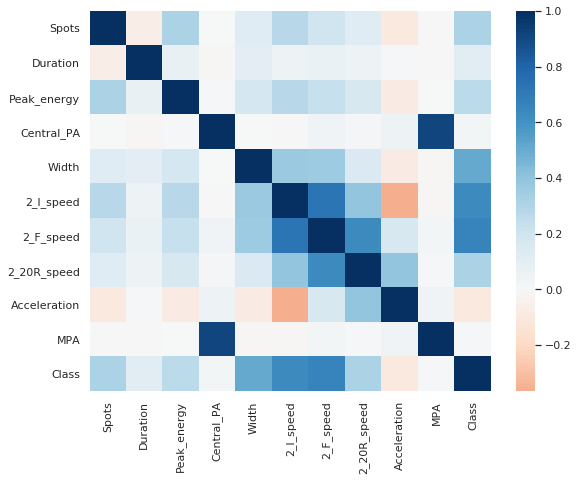

In [233]:
from matplotlib import cm
sns.set(rc = {'figure.figsize':(9, 7)})
sns.heatmap(SFC.corr(), cmap = 'RdBu', center = 0)

In [235]:
SFC.corr()

,Spots,Duration,Peak_energy,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
Spots,1.000000,-0.064902,0.311952,0.004265,0.122508,0.275094,0.204296,0.122487,-0.095990,-0.007662,0.315822
Duration,-0.064902,1.000000,0.073769,-0.009084,0.108576,0.051417,0.066187,0.054065,0.018057,-0.007757,0.112830
Peak_energy,0.311952,0.073769,1.000000,0.009637,0.174848,0.275077,0.229461,0.164295,-0.078696,0.005921,0.273113
Central_PA,0.004265,-0.009084,0.009637,1.000000,0.005032,-0.003500,0.044848,0.019331,0.051290,0.918480,0.025560
Width,0.122508,0.108576,0.174848,0.005032,1.000000,0.373034,0.360681,0.146633,-0.082810,-0.011195,0.509378
2_I_speed,0.275094,0.051417,0.275077,-0.003500,0.373034,1.000000,0.730188,0.392384,-0.366090,-0.009444,0.636614
2_F_speed,0.204296,0.066187,0.229461,0.044848,0.360681,0.730188,1.000000,0.636501,0.167726,0.033031,0.667344
2_20R_speed,0.122487,0.054065,0.164295,0.019331,0.146633,0.392384,0.636501,1.000000,0.392714,0.014539,0.313167
Acceleration,-0.095990,0.018057,-0.078696,0.051290,-0.082810,-0.366090,0.167726,0.392714,1.000000,0.042177,-0.094224
MPA,-0.007662,-0.007757,0.005921,0.918480,-0.011195,-0.009444,0.033031,0.014539,0.042177,1.000000,0.012262


In [236]:
# Correlaciones muy bajas, columnas a eliminar:
# Central_PA
# Acceleration
# MPA

In [237]:
SFC.drop(['Central_PA', 'MPA', 'Acceleration'], axis = 'columns', inplace = True)

In [238]:
# 2_I_speed y 2_F_speed están muy correlacionadas, eliminadmos 2_F_speed


In [239]:
SFC.drop(['2_F_speed'], axis = 'columns', inplace = True)

In [240]:
X = SFC[['Spots', 'Duration', 'Peak_energy', 'Width', '2_I_speed', '2_20R_speed']]
Y = SFC['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

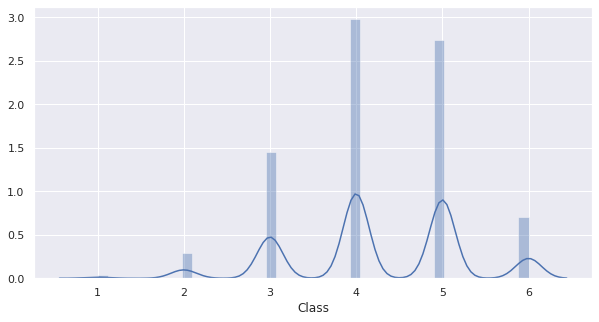

In [243]:
sns.set(rc = {'figure.figsize':(10, 5)})
sns.distplot(SFC['Class'])


In [89]:
# VAMOS A MODELIZAR

In [203]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.precision_score, average = 'macro')

In [90]:
# LOGISTIC REGRESSION

In [260]:
log = LogisticRegression(multi_class = 'ovr', max_iter = 2000, random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [261]:
log_pre = accuracy_score(log.predict(X_train), Y_train)
print(f'Accuracy: {log_pre:.1%}')

Accuracy: 57.6%


In [262]:
cv = 10
log_pre_cv = cross_val_score(log, X_train, Y_train, cv = cv, scoring = 'accuracy').mean()
print(f'Accuracy: {log_pre_cv:.1%}')

Accuracy: 57.4%


In [263]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid = GridSearchCV(log, param_grid, cv = 10, scoring = 'accuracy')

In [264]:
log_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2000, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [265]:
print(f'Best Accuracy: {log_grid.best_score_:.1%}') 
print(f'Best parameters: {log_grid.best_params_:}')

Best Accuracy: 57.4%
Best parameters: {'C': 0.01}


In [266]:
log_best = LogisticRegression(multi_class = 'ovr', max_iter = 2000, C = 0.01, random_state = 0)
log_best.fit(X_train, Y_train)

log_pre_best = accuracy_score(log_best.predict(X_test), Y_test)
print(f'Accuracy: {log_pre_best:.1%}')


Accuracy: 55.2%


In [309]:
print(classification_report(Y_test, log_best.predict(X_test),
                            target_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         4
     Class 2       0.00      0.00      0.00        32
     Class 3       0.47      0.26      0.33       157
     Class 4       0.51      0.75      0.61       316
     Class 5       0.64      0.59      0.62       291
     Class 6       0.73      0.37      0.49        59

    accuracy                           0.55       859
   macro avg       0.39      0.33      0.34       859
weighted avg       0.54      0.55      0.53       859



In [268]:
# K-NEIGHBORS

In [269]:
ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.fit_transform(X_test)

In [270]:
n_neighbors = 10
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_scaled_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [271]:
knn_acc = accuracy_score(knn.predict(X_scaled_train), Y_train)
print(f'Accuracy: {knn_acc:.1%}')

Accuracy: 65.7%


In [272]:
cv = 10
knn_acc_cv = cross_val_score(knn, X_scaled_train, Y_train, cv = cv, scoring = 'accuracy').mean()
print(f'Accuracy: {knn_acc_cv:.1%}')

Accuracy: 58.4%


In [273]:
param_grid = {'n_neighbors':np.arange(1, 50)}
knn_grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')

In [274]:
knn_grid.fit(X_scaled_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [275]:
print(f'Best Accuracy: {knn_grid.best_score_:.1%}') 
print(f'Best parameters: {knn_grid.best_params_:}')

Best Accuracy: 60.7%
Best parameters: {'n_neighbors': 35}


In [276]:
n_neighbors = 35
knn_best = KNeighborsClassifier(n_neighbors)
knn_best.fit(X_scaled_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [277]:
knn_acc_best = accuracy_score(knn_best.predict(X_scaled_test), Y_test)
print(f'Accuracy: {knn_acc_best:.1%}')

Accuracy: 57.2%


In [278]:
print(classification_report(Y_test, knn_best.predict(X_scaled_test),
                            target_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         4
     Class 2       0.50      0.09      0.16        32
     Class 3       0.49      0.38      0.42       157
     Class 4       0.54      0.65      0.59       316
     Class 5       0.62      0.70      0.66       291
     Class 6       0.87      0.34      0.49        59

    accuracy                           0.57       859
   macro avg       0.50      0.36      0.39       859
weighted avg       0.58      0.57      0.56       859



In [279]:
# SVM

In [280]:
svc = SVC(random_state = 0)
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [281]:
svc_acc = accuracy_score(svc.predict(X_train), Y_train)
print(f'Accuracy: {svc_acc:.1%}')

Accuracy: 59.5%


In [282]:
cv = 10
svc_acc_cv = cross_val_score(SVC(random_state = 0), X_train, Y_train, cv = cv, scoring = 'accuracy').mean()
print(f'Accuracy: {svc_acc_cv:.1%}')

Accuracy: 58.8%


In [283]:
param_grid = {'C':[0.1, 1, 10, 100]}
svc_grid = GridSearchCV(svc, param_grid, cv = 10, scoring = 'accuracy')

In [284]:
svc_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [285]:
print(f'Best Accuracy: {svc_grid.best_score_:.1%}') 
print(f'Best parameters: {svc_grid.best_params_:}')

Best Accuracy: 61.0%
Best parameters: {'C': 10}


In [286]:
svc_best = SVC(C = 10, random_state = 0)
svc_best.fit(X_train, Y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [287]:
svc_acc_best = accuracy_score(svc_best.predict(X_test), Y_test)
print(f'Accuracy: {svc_acc_best:.1%}')

Accuracy: 61.7%


In [288]:
print(classification_report(Y_test, svc_best.predict(X_test),
                            target_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         4
     Class 2       0.00      0.00      0.00        32
     Class 3       0.56      0.54      0.55       157
     Class 4       0.58      0.77      0.66       316
     Class 5       0.68      0.62      0.65       291
     Class 6       0.85      0.37      0.52        59

    accuracy                           0.62       859
   macro avg       0.44      0.38      0.40       859
weighted avg       0.61      0.62      0.60       859



In [ ]:
# DECISION TREE

In [289]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [290]:
tree_acc = accuracy_score(tree.predict(X_train), Y_train)
print(f'Accuracy: {tree_acc:.1%}')

Accuracy: 100.0%


In [292]:
cv = 10
tree_acc_cv = cross_val_score(tree, X_train, Y_train, cv = cv, scoring = 'accuracy').mean()
print(f'Accuracy: {tree_acc_cv:.1%}')

Accuracy: 50.3%


In [293]:
param_grid = {'max_depth':np.arange(1, 10, 1), 'min_samples_leaf':np.arange(1, 50, 2),
             'min_samples_split':np.arange(1, 30, 2)}
tree_grid = GridSearchCV(tree, param_grid, cv = 10, scoring = 'accuracy')

In [294]:
tree_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([

In [295]:
print(f'Best Accuracy: {tree_grid.best_score_:.1%}') 
print(f'Best parameters: {tree_grid.best_params_:}')

Best Accuracy: 59.9%
Best parameters: {'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 3}


In [296]:
tree_best = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 41, min_samples_split = 3, random_state = 0)
tree_best.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=41, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [297]:
tree_acc_best = accuracy_score(tree_best.predict(X_test), Y_test)
print(f'Accuracy: {tree_acc_best:.1%}')

Accuracy: 57.0%


In [298]:
print(classification_report(Y_test, tree_best.predict(X_test), 
                            target_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         4
     Class 2       0.32      0.19      0.24        32
     Class 3       0.53      0.48      0.51       157
     Class 4       0.55      0.69      0.61       316
     Class 5       0.63      0.55      0.59       291
     Class 6       0.61      0.51      0.56        59

    accuracy                           0.57       859
   macro avg       0.44      0.40      0.42       859
weighted avg       0.57      0.57      0.56       859



In [ ]:
# RANDOM FOREST

In [125]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [126]:
rf_acc = accuracy_score(rf.predict(X_train), Y_train)
print(f'Accuracy: {rf_acc:.1%}')

Accuracy: 100.0%


In [127]:
rf_acc = accuracy_score(rf.predict(X_test), Y_test)
print(f'Accuracy: {rf_acc:.1%}')

Accuracy: 60.1%


In [128]:
cv = 10
rf_acc_cv = cross_val_score(rf, X_train, Y_train, cv = cv, scoring = 'accuracy').mean()
print(f'Accuracy: {rf_acc_cv:.1%}')

Accuracy: 60.6%


In [ ]:
# Ver parámetros

In [99]:
param_grid = {'max_depth': np.arange(1, 10, 1), 'min_samples_leaf': np.arange(1, 50, 2)}
rf_grid = GridSearchCV(rf, param_grid, cv = 10, scoring = 'accuracy')

In [100]:
rf_grid.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
print(f'Best Accuracy: {rf_grid.best_score_:.1%}') 
print(f'Best parameters: {rf_grid.best_params_:}')

In [ ]:
# XGBoost

In [299]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [300]:
xgb_acc = accuracy_score(xgb.predict(X_train), Y_train)
print(f'Accuracy: {xgb_acc:.1%}')

Accuracy: 99.4%


In [301]:
cv = 10
xgb_acc_cv = cross_val_score(xgb, X_train, Y_train, cv = cv, scoring = 'accuracy').mean()
print(f'Accuracy: {xgb_acc_cv:.1%}')

Accuracy: 59.4%


In [302]:
param_grid = {
    'n_estimators': np.arange(10, 1000, 200),
    'max_depth': np.arange(1, 10, 1),
    'learning_rate': np.arange(0.1, 0.5, 0.1)}
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 10, scoring = 'accuracy')

In [303]:
xgb_grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=10...
                                           subsample=1, tree_method='exact',
                                           validate_parameters=1,
                                     

In [304]:
print(f'Best Accuracy: {xgb_grid.best_score_:.1%}') 
print(f'Best parameters: {xgb_grid.best_params_:}')

Best Accuracy: 60.4%
Best parameters: {'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.30000000000000004}


In [305]:
xgb_best = XGBClassifier(n_estimators = 610, max_depth = 1, learning_rate = 0.3)
xgb_best.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=610, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
xgb_acc_best = accuracy_score(xgb_best.predict(X_test), Y_test)
print(f'Accuracy: {xgb_acc_best:.1%}')

Accuracy: 59.1%


In [307]:
print(classification_report(Y_test, xgb_best.predict(X_test), 
                            target_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         4
     Class 2       0.58      0.22      0.32        32
     Class 3       0.56      0.50      0.53       157
     Class 4       0.57      0.70      0.63       316
     Class 5       0.65      0.60      0.62       291
     Class 6       0.56      0.46      0.50        59

    accuracy                           0.59       859
   macro avg       0.49      0.41      0.43       859
weighted avg       0.59      0.59      0.59       859

